In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Greenland = pd.read_excel(filepath, sheet_name='Greenland-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Greenland)
fp.date_time(Greenland)

,Extent,Date
0,1076123.146,1979-01-01
1,1099248.063,1979-02-01
2,1036964.901,1979-03-01
3,958927.937,1979-04-01
4,823812.694,1979-05-01
...,...,...
533,721350.515,2023-06-01
534,459033.164,2023-07-01
535,282045.909,2023-08-01
536,270397.608,2023-09-01


In [5]:
scaler = MinMaxScaler()
Greenland['Extent'] = scaler.fit_transform(Greenland['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 8
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Greenland['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((519, 12, 1), (519,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Greenland_model_LT8/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 0.3199 - root_mean_squared_error: 0.5656

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 7s 83ms/step - loss: 0.3199 - root_mean_squared_error: 0.5656 - val_loss: 0.1362 - val_root_mean_squared_error: 0.3690
Epoch 2/50
50/53 [===========================>..] - ETA: 0s - loss: 0.2469 - root_mean_squared_error: 0.4968

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 53ms/step - loss: 0.2469 - root_mean_squared_error: 0.4969 - val_loss: 0.1040 - val_root_mean_squared_error: 0.3225
Epoch 3/50
45/53 [========================>.....] - ETA: 0s - loss: 0.2014 - root_mean_squared_error: 0.4488

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.2036 - root_mean_squared_error: 0.4513 - val_loss: 0.0841 - val_root_mean_squared_error: 0.2900
Epoch 4/50
52/53 [============================>.] - ETA: 0s - loss: 0.1665 - root_mean_squared_error: 0.4081

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.1654 - root_mean_squared_error: 0.4067 - val_loss: 0.0676 - val_root_mean_squared_error: 0.2601
Epoch 5/50
53/53 [==============================] - ETA: 0s - loss: 0.1354 - root_mean_squared_error: 0.3680

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.1354 - root_mean_squared_error: 0.3680 - val_loss: 0.0537 - val_root_mean_squared_error: 0.2317
Epoch 6/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1102 - root_mean_squared_error: 0.3320

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 58ms/step - loss: 0.1046 - root_mean_squared_error: 0.3233 - val_loss: 0.0415 - val_root_mean_squared_error: 0.2038
Epoch 7/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0835 - root_mean_squared_error: 0.2889

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0811 - root_mean_squared_error: 0.2849 - val_loss: 0.0323 - val_root_mean_squared_error: 0.1796
Epoch 8/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0651 - root_mean_squared_error: 0.2552

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0623 - root_mean_squared_error: 0.2496 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1553
Epoch 9/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0500 - root_mean_squared_error: 0.2237

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0479 - root_mean_squared_error: 0.2188 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1402
Epoch 10/50
52/53 [============================>.] - ETA: 0s - loss: 0.0354 - root_mean_squared_error: 0.1882

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.0355 - root_mean_squared_error: 0.1885 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1349
Epoch 11/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0288 - root_mean_squared_error: 0.1696

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 53ms/step - loss: 0.0290 - root_mean_squared_error: 0.1703 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1196
Epoch 12/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0252 - root_mean_squared_error: 0.1589

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0245 - root_mean_squared_error: 0.1565 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1149
Epoch 13/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0174 - root_mean_squared_error: 0.1319

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 50ms/step - loss: 0.0176 - root_mean_squared_error: 0.1327 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118
Epoch 14/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0161 - root_mean_squared_error: 0.1271

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 58ms/step - loss: 0.0160 - root_mean_squared_error: 0.1266 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1088
Epoch 15/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0149 - root_mean_squared_error: 0.1222 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1319
Epoch 16/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.1211

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0147 - root_mean_squared_error: 0.1214 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1057
Epoch 17/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0142 - root_mean_squared_error: 0.1193 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1219
Epoch 18/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0114 - root_mean_squared_error: 0.1067 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1200
Epoch 19/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0134 - root_mean_squared_error: 0.1158 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1237
Epoch 20/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1126

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 54ms/step - loss: 0.0130 - root_mean_squared_error: 0.1139 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1057
Epoch 21/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0124 - root_mean_squared_error: 0.1114 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1083
Epoch 22/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0132 - root_mean_squared_error: 0.1147 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1329
Epoch 23/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0121 - root_mean_squared_error: 0.1102 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1059
Epoch 24/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0110 - root_mean_squared_error: 0.1051 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1171
Epoch 25/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0113 - root_mean_squared_error: 0.1064 - val_loss: 0.0172 - val_root_mean_squared

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0115 - root_mean_squared_error: 0.1073 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1030
Epoch 32/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0110 - root_mean_squared_error: 0.1048 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1117
Epoch 33/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0109 - root_mean_squared_error: 0.1046 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1121
Epoch 34/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0112 - root_mean_squared_error: 0.1057 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1294
Epoch 35/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0116 - root_mean_squared_error: 0.1076 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1159
Epoch 36/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0121 - root_mean_squared_error: 0.1102 - val_loss: 0.0127 - val_root_mean_squared

INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


INFO:tensorflow:Assets written to: Greenland_model_LT8\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0119 - root_mean_squared_error: 0.1092 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1018
Epoch 47/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0124 - root_mean_squared_error: 0.1113 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1351
Epoch 48/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0116 - root_mean_squared_error: 0.1078 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1093
Epoch 49/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1039
Epoch 50/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1188


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.1654544234275819 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

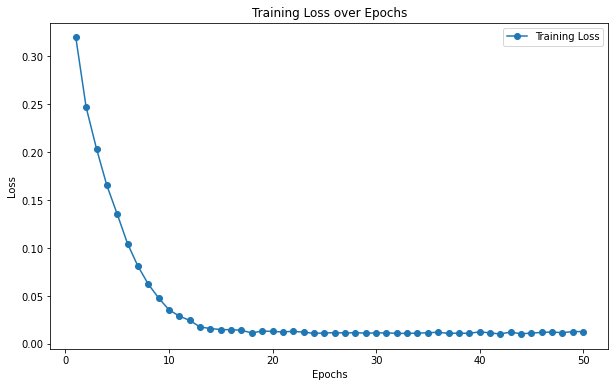

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

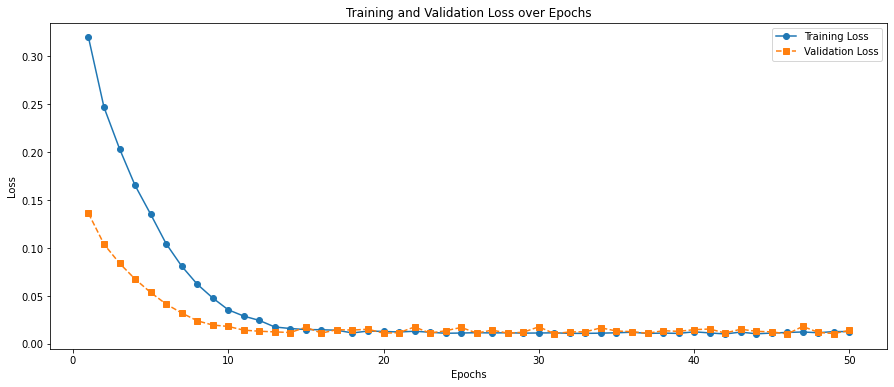

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Greenland_model_LT8/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 13ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.09131225945110816
MAE : 0.0706074297187434


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,545514.437500,584596.262
1,623635.062500,584830.109
2,647186.687500,641562.292
3,674390.437500,734946.437
4,663911.000000,777596.225
5,642183.750000,687087.673
6,606554.937500,622337.816
7,432784.843750,467232.074
8,283280.218750,297495.641
9,307039.343750,268909.854


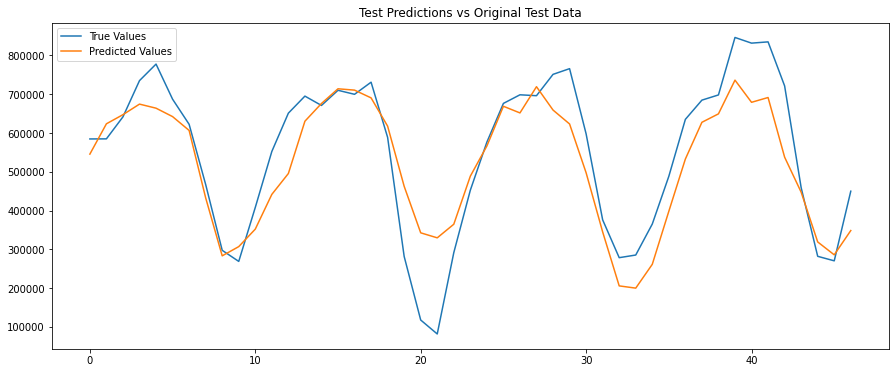

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 2ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

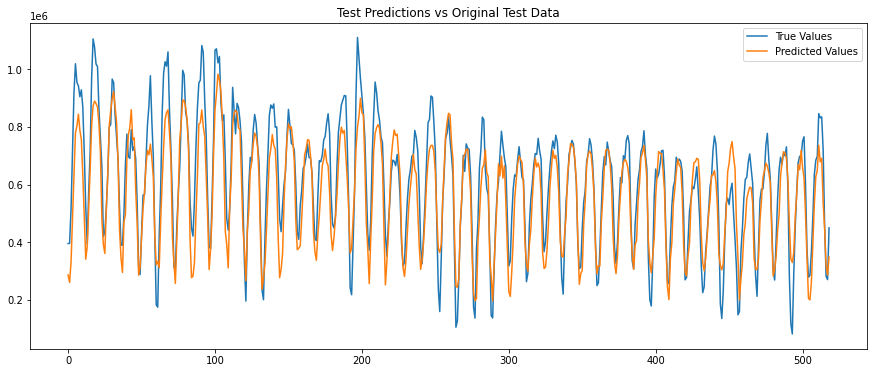

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()